### Bell State Circuits

In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

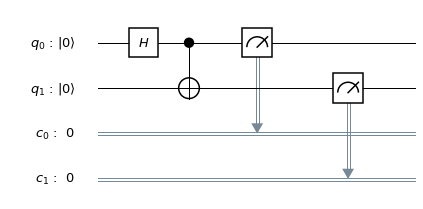

In [3]:
num_qubits = 2;
num_bits   = 2;
bell = QuantumCircuit(2,2)
bell.h(0)
bell.cx(0, 1)
bell.measure([0,1], [0,1])

bell.draw(output='mpl')

- initial state = |00>
- After application of Hadamard Gate: $\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|10> $
- After application of CNOT Gate: $\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|11> $


In [3]:
simulator = Aer.get_backend('qasm_simulator')


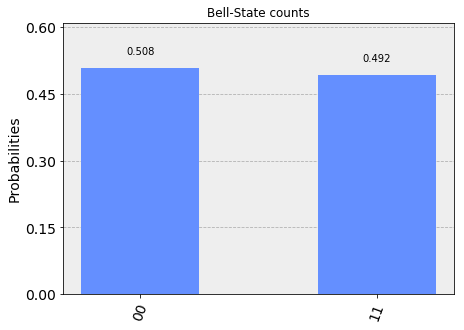

In [4]:
result = execute(bell, simulator).result()
counts = result.get_counts(bell)
plot_histogram(counts, title='Bell-State counts')

### Extended Circuit -1

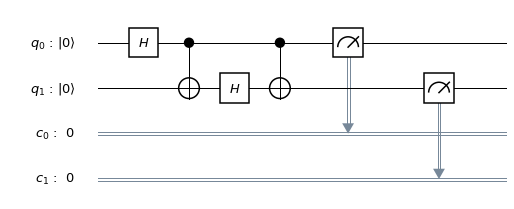

In [5]:
num_qubits = 2;
num_bits   = 2;
bell = QuantumCircuit(2,2)
bell.h(0)
bell.cx(0, 1)
bell.h(1)
bell.cx(0, 1)
bell.measure([0,1], [0,1])

bell.draw(output='mpl')


- initial state = |00>
- After application of Hadamard Gate: $\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|10> $
- After application of CNOT Gate: $\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|11> $
- After application of Hadamard Gate: 
$\frac{1}{2}|00> + \frac{1}{2}|01> + \frac{1}{2}|10> - \frac{1}{2}|11> $
- After application of CNOT Gate: 
$\frac{1}{2}|00> + \frac{1}{2}|01> + \frac{1}{2}|11> - \frac{1}{2}|10> $


In [6]:
simulator = Aer.get_backend('qasm_simulator')

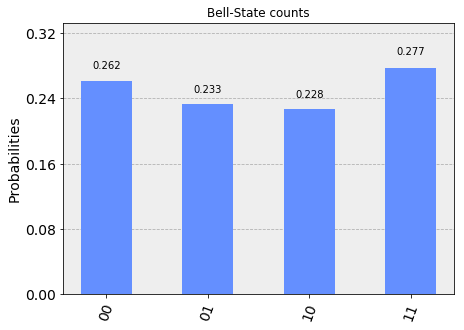

In [7]:
result = execute(bell, simulator).result()
counts = result.get_counts(bell)
plot_histogram(counts, title='Bell-State counts')

### Extended Circuit -2 

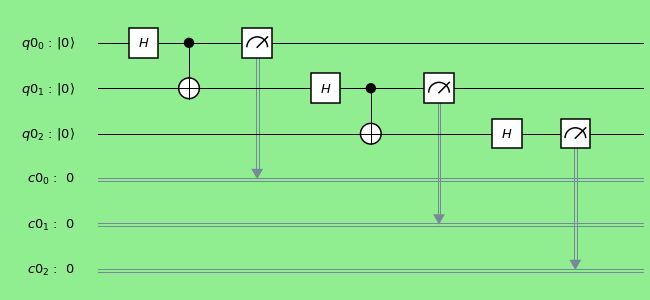

In [8]:
n =3
q = QuantumRegister(n)
c = ClassicalRegister(n)
circ = QuantumCircuit(q,c)
circ.h(q[0])
circ.cx(q[0], q[1])
circ.h(q[1])
circ.cx(q[1], q[2])
circ.h(q[2])
circ.measure(q,c)

# Change the background color in mpl
style = {'backgroundcolor': 'lightgreen'}
circ.draw(output='mpl', style = style)

- Initial state: |000>
- After Hadamard Gate : $\frac{1}{\sqrt{2}}|000> + \frac{1}{\sqrt{2}}|100> $
- After CNOT Gate : $\frac{1}{\sqrt{2}}|000> + \frac{1}{\sqrt{2}}|110> $
- After Hadamard Gate : $\frac{1}{{2}}|000> + \frac{1}{{2}}|010>  +  \frac{1}{{2}}|100> - \frac{1}{{2}}|110>$
- After CNOT Gate :$\frac{1}{{2}}|000> + \frac{1}{{2}}|011>  +  \frac{1}{{2}}|100> - \frac{1}{{2}}|111>$
- After Hadamard Gate :$\frac{1}{2\sqrt{2}}|000> + \frac{1}{2\sqrt{2}}|001> + \frac{1}{2\sqrt{2}}|010>  - \frac{1}{2\sqrt{2}}|011> +  \frac{1}{2\sqrt{2}}|100> + \frac{1}{2\sqrt{2}}|101>  - \frac{1}{2\sqrt{2}}|110> + \frac{1}{2\sqrt{2}}|111>$


In [9]:
simulator = Aer.get_backend('qasm_simulator')

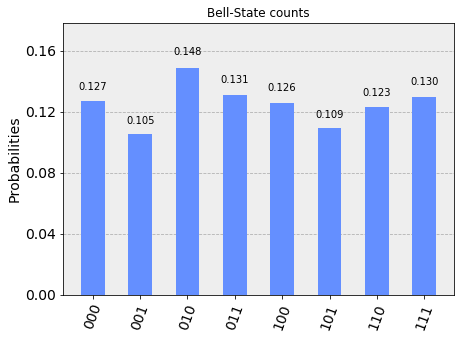

In [10]:
result = execute(circ, simulator).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

### References

1. https://quantumcomputing.stackexchange.com/questions/2299/how-to-interpret-a-quantum-circuit-as-a-matrix